# **Task 1**


# 3 different Dense architectures



**1st Dense model architecture**

---

> Changing the activation function of encoder and decoder to 'sigmoid' and training the model with epochs=100



TensorFlow version: 2.8.0
Is Executing Eagerly? True
Epoch 1/100. Loss: 14.330190658569336
Epoch 2/100. Loss: 8.301276206970215
Epoch 3/100. Loss: 5.493320941925049
Epoch 4/100. Loss: 4.2153520584106445
Epoch 5/100. Loss: 3.4601798057556152
Epoch 6/100. Loss: 3.005836009979248
Epoch 7/100. Loss: 2.6781842708587646
Epoch 8/100. Loss: 2.4255430698394775
Epoch 9/100. Loss: 2.2407054901123047
Epoch 10/100. Loss: 2.0888407230377197
Epoch 11/100. Loss: 1.941770315170288
Epoch 12/100. Loss: 1.832909345626831
Epoch 13/100. Loss: 1.748864769935608
Epoch 14/100. Loss: 1.6541980504989624
Epoch 15/100. Loss: 1.570697546005249
Epoch 16/100. Loss: 1.5335344076156616
Epoch 17/100. Loss: 1.4976224899291992
Epoch 18/100. Loss: 1.4688184261322021
Epoch 19/100. Loss: 1.4031810760498047
Epoch 20/100. Loss: 1.3362617492675781
Epoch 21/100. Loss: 1.2919622659683228
Epoch 22/100. Loss: 1.259909987449646
Epoch 23/100. Loss: 1.2382131814956665
Epoch 24/100. Loss: 1.2191029787063599
Epoch 25/100. Loss: 1.179374

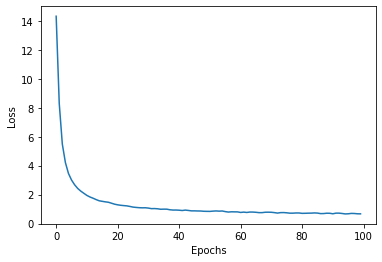

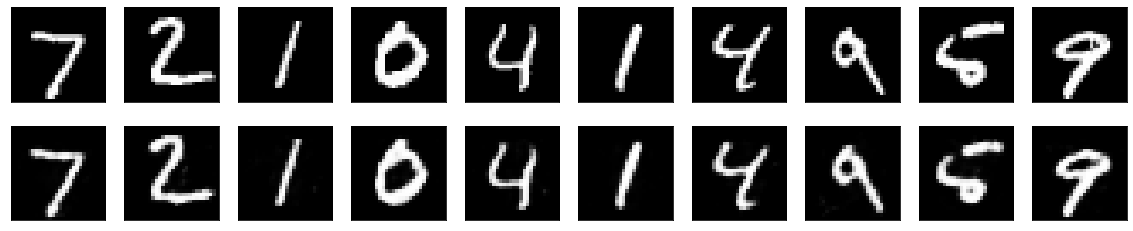

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

#Encoding Layer

class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid) 
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

#Decoder

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid)  #Activation function change from relu to sigmoid
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

#AutoEncoder

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed


#Reconstruction Error

def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Forward Pass and Optimization

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

#Training Loop

def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))


#Process the dataset

from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)


#Train the model

model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100) #Changed to 100 epochs

#Plot the in-training performance

plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Predictions

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**2nd Dense model architecture**

---
> Changing the activation function of encoder to 'tanh' and decoder to 'sigmoid' and training the model with epochs=100



TensorFlow version: 2.8.0
Is Executing Eagerly? True
Epoch 1/100. Loss: 13.352874755859375
Epoch 2/100. Loss: 8.179059028625488
Epoch 3/100. Loss: 5.9196577072143555
Epoch 4/100. Loss: 4.789609432220459
Epoch 5/100. Loss: 4.0428547859191895
Epoch 6/100. Loss: 3.531277894973755
Epoch 7/100. Loss: 3.1468918323516846
Epoch 8/100. Loss: 2.9004008769989014
Epoch 9/100. Loss: 2.6457533836364746
Epoch 10/100. Loss: 2.551332712173462
Epoch 11/100. Loss: 2.38569974899292
Epoch 12/100. Loss: 2.223397970199585
Epoch 13/100. Loss: 2.0956249237060547
Epoch 14/100. Loss: 2.0242066383361816
Epoch 15/100. Loss: 2.0491323471069336
Epoch 16/100. Loss: 1.963269591331482
Epoch 17/100. Loss: 1.8664226531982422
Epoch 18/100. Loss: 1.836675763130188
Epoch 19/100. Loss: 1.7179640531539917
Epoch 20/100. Loss: 1.7830122709274292
Epoch 21/100. Loss: 1.6939172744750977
Epoch 22/100. Loss: 1.7034703493118286
Epoch 23/100. Loss: 1.6380021572113037
Epoch 24/100. Loss: 1.6584546566009521
Epoch 25/100. Loss: 1.5910618

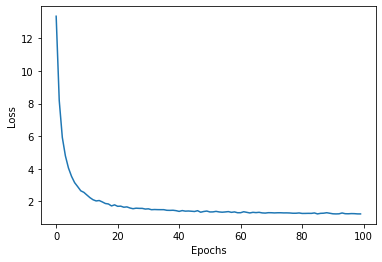

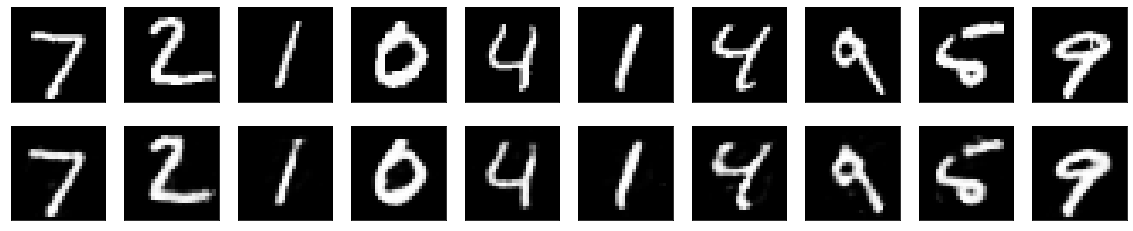

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

#Encoding Layer

class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.tanh) #Activation function change from relu to tanh
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.tanh) #Activation function change from relu to tanh
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

#Decoder

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid)  #Activation function change from relu to sigmoid
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid) #Activation function change from relu to sigmoid
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

#AutoEncoder

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed


#Reconstruction Error

def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Forward Pass and Optimization

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

#Training Loop

def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))


#Process the dataset

from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)


#Train the model

model2 = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model2, opt, loss, training_dataset, 100) #Changed to 100 epochs

#Plot the in-training performance

plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Predictions

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**3rd Dense Model architecture**

---


> 3 hidden layer model with Sigmoid Activation Function



TensorFlow version: 2.8.0
Is Executing Eagerly? True
11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/100. Loss: 16.29350471496582
Epoch 2/100. Loss: 14.761857986450195
Epoch 3/100. Loss: 12.439099311828613
Epoch 4/100. Loss: 10.069985389709473
Epoch 5/100. Loss: 8.374810218811035
Epoch 6/100. Loss: 7.687917232513428
Epoch 7/100. Loss: 7.302093982696533
Epoch 8/100. Loss: 7.047226428985596
Epoch 9/100. Loss: 6.835387706756592
Epoch 10/100. Loss: 6.643302917480469
Epoch 11/100. Loss: 6.413280963897705
Epoch 12/100. Loss: 6.156081676483154
Epoch 13/100. Loss: 5.950503349304199
Epoch 14/100. Loss: 5.752543926239014
Epoch 15/100. Loss: 5.600301742553711
Epoch 16/100. Loss: 5.44279670715332
Epoch 17/100. Loss: 5.252129554748535
Epoch 18/100. Loss: 5.0550336837768555
Epoch 19/100. Loss: 4.852725982666016
Epoch 20/100. Loss: 4.6891398429870605
Epoch 21/100. Loss: 4.496148109436035
Epoch 22/100. Loss: 4.352899551391602
Epoch 23/100. Loss: 4.245429515838623
Epoch 24/100.

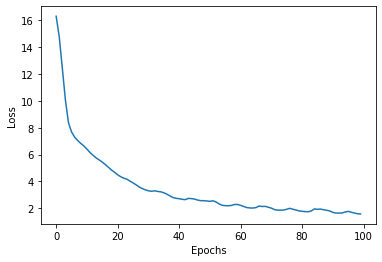

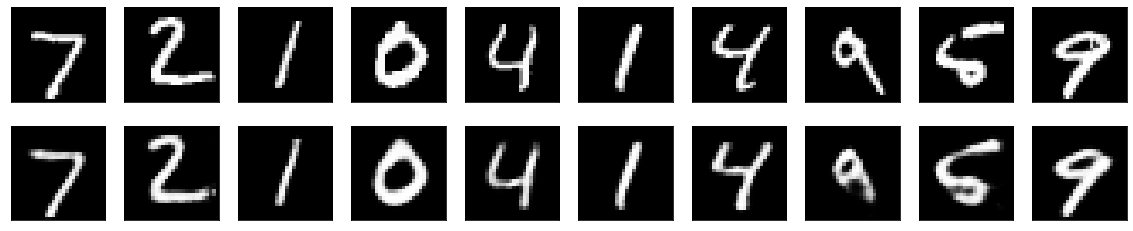

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

#Encoder
class Encoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_three, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid, dtype = 'float32')
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.sigmoid, dtype = 'float32')
        self.hidden_layer3 = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.sigmoid, dtype = 'float32')
        self.output_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.sigmoid, dtype = 'float32')
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        layer2 = self.hidden_layer2(layer1)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

#Decoder
class Decoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_three, self).__init__()
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.sigmoid, dtype = 'float32')
        self.hidden_layer3 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.sigmoid, dtype = 'float32')
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid, dtype = 'float32')
  
    def call(self, code):
        #layer1 = self.hidden_layer(code)
        layer2 = self.hidden_layer2(code)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

#AutoEncoder
class Autoencoder_three(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_three, self).__init__()
    self.loss = []
    self.encoder = Encoder_three(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_three(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#Reconstruction Error
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Forward pass and optimization

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

#Training loop
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

#Process the datatset
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

#Train the model
model3 = Autoencoder_three(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model3, opt, loss, training_dataset, 100)

#Plot the in-training performance
plt.plot(range(100), model3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Predictions

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model3(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In terms of predictions, Model 1 is performing the best, having Loss:0.6682797074317932 and returning the almost same output as input.

# CNN Models

Basic CNN model

---

Epoch 1/100
469/469 [==============================] - 9s 17ms/step - loss: 0.6858 - val_loss: 0.6842
Epoch 2/100
469/469 [==============================] - 7s 15ms/step - loss: 0.6818 - val_loss: 0.6790
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.6745 - val_loss: 0.6692
Epoch 4/100
469/469 [==============================] - 6s 14ms/step - loss: 0.6601 - val_loss: 0.6485
Epoch 5/100
469/469 [==============================] - 6s 13ms/step - loss: 0.6264 - val_loss: 0.5967
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 0.5517 - val_loss: 0.5168
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 0.5039 - val_loss: 0.5007
Epoch 8/100
469/469 [==============================] - 6s 13ms/step - loss: 0.4931 - val_loss: 0.4919
Epoch 9/100
469/469 [==============================] - 6s 13ms/step - loss: 0.4846 - val_loss: 0.4837
Epoch 10/100
469/469 [==============================] - 6s 13ms/step - loss: 0.476

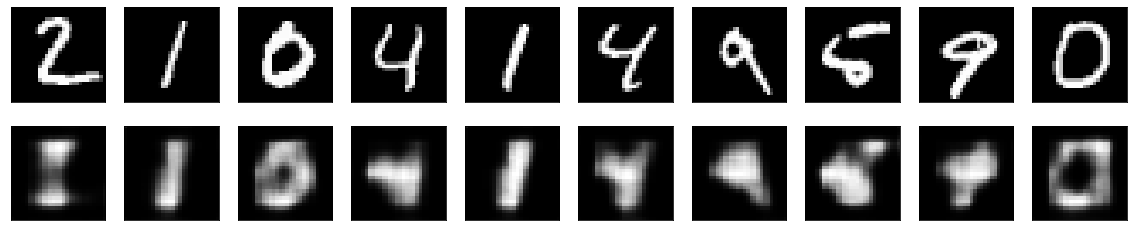

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])


decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Complex CNN
---

Epoch 1/100
469/469 [==============================] - 7s 13ms/step - loss: 0.2134 - val_loss: 0.1428
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1339 - val_loss: 0.1259
Epoch 3/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1232 - val_loss: 0.1184
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1175 - val_loss: 0.1141
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1139 - val_loss: 0.1111
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1112 - val_loss: 0.1088
Epoch 7/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1092 - val_loss: 0.1072
Epoch 8/100
469/469 [==============================] - 5s 12ms/step - loss: 0.1074 - val_loss: 0.1053
Epoch 9/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1059 - val_loss: 0.1043
Epoch 10/100
469/469 [==============================] - 6s 12ms/step - loss: 0.104

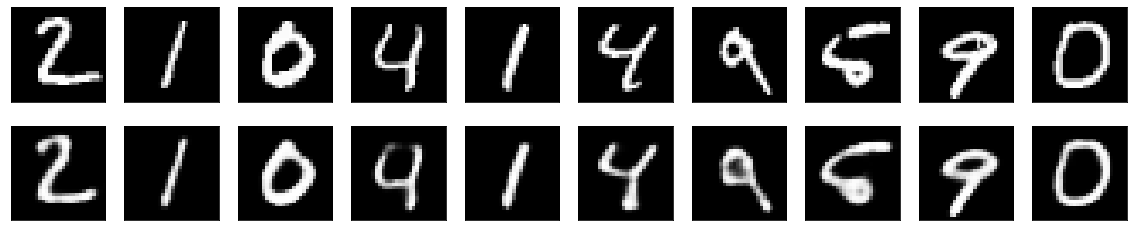

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CM1 = tf.keras.models.Model(input_img, decoded)
autoencoder_CM1.compile(optimizer='adam', loss='binary_crossentropy')

# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder_CM1.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])


decoded_imgs = autoencoder_CM1.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Complex CNN_optim

---

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/100
938/938 [==============================] - 34s 24ms/step - loss: 0.0195 - val_loss: 0.0107
Epoch 2/100
938/938 [==============================] - 20s 22ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 3/100
938/938 [==============================] - 20s 22ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 4/100
938/938 [==============================] - 20s 21ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 5/100
938/938 [==============================] - 21s 22ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 6/100
938/938 [==============================] - 20s 21ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 7/100
938/938 [==============================] - 20s 21ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 8/100
938/938 [==============================] - 20s 21ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 9/100
938/938 [==============================] - 20s 21ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 10

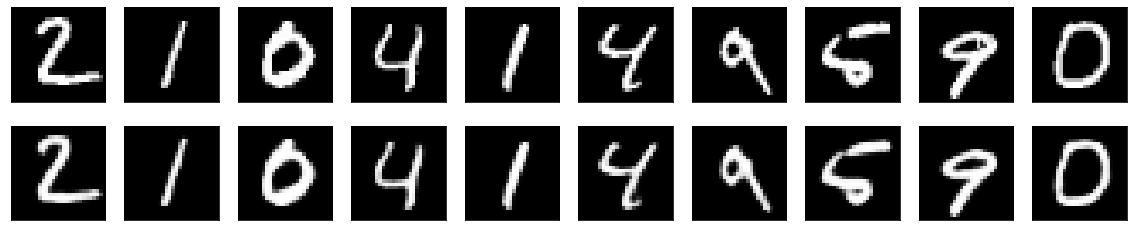

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
tf.keras.layers.BatchNormalization()(x)

encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
tf.keras.layers.BatchNormalization()(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CM2 = tf.keras.models.Model(input_img, decoded)
autoencoder_CM2.compile(optimizer='adam', loss='mean_squared_error') #Changed the loss function

# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

model = autoencoder_CM2.fit(x_train, x_train, epochs=100, batch_size=64, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

decoded_imgs = autoencoder_CM2.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
# Display original
  ax = plt.subplot(2, n, i)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# Display reconstruction
  ax = plt.subplot(2, n, i + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
encoder = tf.keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# **Model comparisons**

****Dense Layer Model Comparisons****

Number of Hidden Layers | Loss
--|--
1 | 0.667
2 | 1.227
3 | 1.587


*****Discussion*****

From the above table of the Dense layer models shows that the basic model with 1 hidden layer with Sigmoid activation is performing the best. In other 2 models, changing the encoder activation function to 'tanh' & decoder activation function to 'sigmoid' or increasing the layers, reducing the dimension of the code, due to which there is loss of data and hence, the accuracy drops.

****CNN Model Comparisons****

Model Type | Loss
--|--
Basic CNN | 0.2077
Complex CNN Model | 0.0892
Complex CNN_optim | 0.0023

*****Discussion*****

> From the above table we can see that the Complex CNN_optim is performing the best. As we noticed, the base model was not performing well. In the complex model, updated the base model itself, like adding a dense layer to encoder and decoder, changing the optimizer form "adadelta" to "adam". The optimizations and adding layers on the base model enabled the accuracy to improve.

****Overall Comparison****
> Due to the fact that each of the models uses a different method for measuring loss and uses a different optimizer, it would not be right to compare them based on losses. Compared to the other 4 models, the Complex CNN_optim model produces images that are clearer and performs better than that of the other models. CNN performs better at image recognition, as evidenced by this result. Therefore,the CNN model works best for this case.

# **Task2**

#Denoising autoencoder

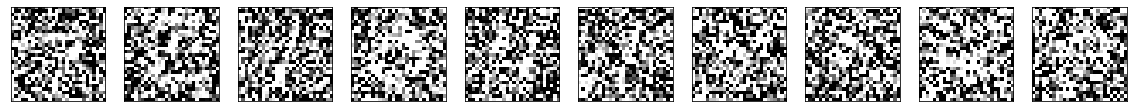

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy_buffer = x_train_noisy
x_test_noisy_buffer = x_test_noisy

x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_train_noisy = x_train_noisy.astype(np.float32)
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))

noisy_train_ds = tf.data.Dataset.from_tensor_slices(x_train_noisy).batch(256)

x_train_ann = x_train_noisy
x_test_ann = x_test_noisy

x_train_noisy = x_train_noisy_buffer
x_test_noisy = x_test_noisy_buffer

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

DENOISING ARCHITECTURE-1: Training noisy data on the Dense Model_3Hidden Layers model

(60000, 784)
TensorFlow version: 2.8.0
Is Executing Eagerly? True
Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2458 - val_loss: 0.2124
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2027 - val_loss: 0.1944
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1894 - val_loss: 0.1860
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1821 - val_loss: 0.1808
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1769 - val_loss: 0.1789
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1727 - val_loss: 0.1767
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1695 - val_loss: 0.1727
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1662 - val_loss: 0.1723
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1635 - val_loss: 0.1698
Epoch 10/100
469/469 [===

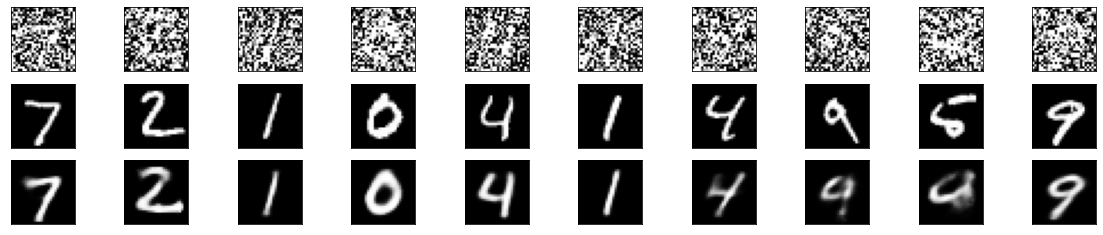

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

#Process the datatset
(x_train, _), (x_test, _) = mnist.load_data()

x_train_noisy = np.reshape(x_train_noisy,(x_train_noisy.shape[0], 784))
print(x_train_noisy.shape)
x_test_noisy = np.reshape(x_test_noisy,(x_test_noisy.shape[0], 784))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))
training_denoise_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

#Encoder
class Encoder_denoise(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_denoise, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=512, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.hidden_layer_3 = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer_1(input_features)
        layer2 = self.hidden_layer_2(layer1)
        activation = self.hidden_layer_3(layer2)
        return self.output_layer(activation)

#Decoder
class Decoder_denoise(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_denoise, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=256, activation = tf.nn.relu)
        self.hidden_layer_3 = tf.keras.layers.Dense(units=512, activation = tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        layer2 = self.hidden_layer_1(code)
        activation = self.hidden_layer_2(layer2)
        return self.output_layer(activation)

#AutoEncoder
class Autoencoder_denoise(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_denoise, self).__init__()
    self.loss = []
    self.encoder = Encoder_denoise(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_denoise(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#Reconstruction Error
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Train the model
model_denoise = Autoencoder_denoise(intermediate_dim=256, original_dim=784)
model_denoise.compile(loss= 'binary_crossentropy' , optimizer = 'adam')
model_denoise.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

#opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
#train_loop(model_denoise, opt, loss, training_denoise_dataset, 100)
#ann_out_img_noisy = model_denoise.predict(x_test_ann)

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    ax = plt.subplot(3, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(3, number, index + 1 + number)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, number, index + 1 + (2 * number))
    plt.imshow(model_denoise(x_test_noisy)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

DENOISING ARCHITECTURE-2: Training noisy data on CNN model



Epoch 1/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1966 - val_loss: 0.1960
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1957 - val_loss: 0.1937
Epoch 3/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1949 - val_loss: 0.1939
Epoch 4/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1943 - val_loss: 0.1931
Epoch 5/100
469/469 [==============================] - 8s 18ms/step - loss: 0.1939 - val_loss: 0.1925
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1933 - val_loss: 0.1918
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1931 - val_loss: 0.1919
Epoch 8/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1926 - val_loss: 0.1909
Epoch 9/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1922 - val_loss: 0.1920
Epoch 10/100
469/469 [==============================] - 5s 12ms/step - loss: 0.191

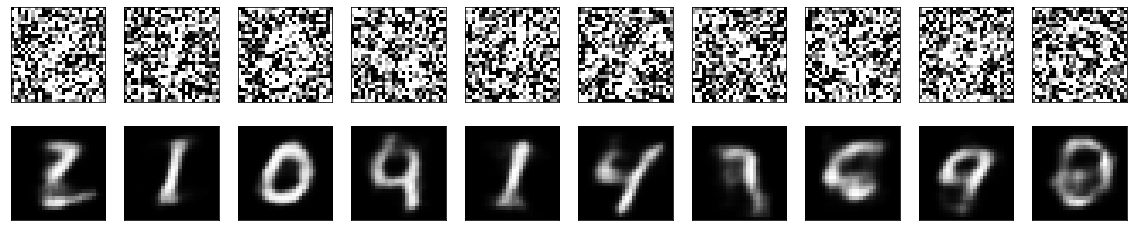

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# This will train for 100 epochs
autoencoder_CM1.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(autoencoder_CM1(x_test_noisy)[i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

DENOISING ARCHITECTURE-3: Training noisy data on CNN complex_optim model



Epoch 1/100
469/469 [==============================] - 17s 36ms/step - loss: 0.0380 - val_loss: 0.0353
Epoch 2/100
469/469 [==============================] - 17s 36ms/step - loss: 0.0342 - val_loss: 0.0339
Epoch 3/100
469/469 [==============================] - 17s 35ms/step - loss: 0.0331 - val_loss: 0.0332
Epoch 4/100
469/469 [==============================] - 17s 36ms/step - loss: 0.0325 - val_loss: 0.0322
Epoch 5/100
469/469 [==============================] - 17s 35ms/step - loss: 0.0320 - val_loss: 0.0316
Epoch 6/100
469/469 [==============================] - 17s 36ms/step - loss: 0.0316 - val_loss: 0.0317
Epoch 7/100
469/469 [==============================] - 17s 36ms/step - loss: 0.0313 - val_loss: 0.0312
Epoch 8/100
469/469 [==============================] - 17s 36ms/step - loss: 0.0310 - val_loss: 0.0324
Epoch 9/100
469/469 [==============================] - 17s 35ms/step - loss: 0.0308 - val_loss: 0.0310
Epoch 10/100
469/469 [==============================] - 17s 36ms/step - l

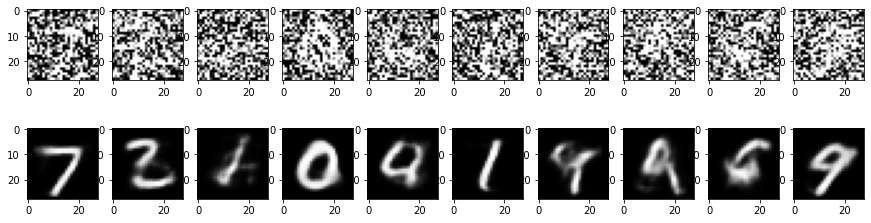

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# This will train for 100 epochs
autoencoder_CM2.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

cnncomplex_img_noisy = autoencoder_CM2.predict(x_test_noisy)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(cnncomplex_img_noisy[i].reshape(28,28))

plt.show()

# **Model comparisons**

Models | Loss
--|--
Dense Model_3Hidden Layers | 0.1183
Complex CNN| 0.1817
Complex CNN_optim | 0.0273


*****Discussion*****
The above table shows the loss for each type of model. The loss metric used to calculate these losses varies for each model, so we cannot compare them. However, if we look at the prediction result images, we can clearly say that the Complex CNN_optim model is performing the best as compared to the other models. As seen in part 1, this result matches that of part 2.

# **Task3**

#Text Reconstruction Application

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(111)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

train_path = Path('/datasets/train/')
train_clean_path = Path('/datasets/train_cleaned')
test_path = Path('/datasets/test')

# Train dataset
!wget -cP /datasets/ "https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip"
# Train labels
!wget -cP /datasets/ "https://github.com/gmprovan/CS6421-Assignment1/raw/master/train_cleaned.zip"
# Test dataset
!wget -cP /datasets/ "https://github.com/gmprovan/CS6421-Assignment1/raw/master/test.zip"
!unzip /datasets/train.zip -d /datasets/
!unzip /datasets/train_cleaned.zip -d /datasets/
!unzip /datasets/test.zip -d /datasets/
print(train_path)
print(list(train_path.glob('**/*.png')))
image_count = len(list(train_path.glob('**/*.png')))

--2022-03-29 18:19:14--  https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip [following]
--2022-03-29 18:19:14--  https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2022-03-29 18:19:14--  https://github.com/gmprovan/CS6421-Assignment1/raw/master/train_cleaned.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github

DENSE LAYER

In [ ]:
from posix import WCOREDUMP
import numpy as np
import tensorflow as tf
from tensorflow.keras.metrics import RootMeanSquaredError

X = []
Y = []
W = []

train_images = os.listdir(train_path)
train_labels = os.listdir(train_clean_path)
test_images = os.listdir(test_path)

for img in train_images:
  img = load_img(train_path/img, grayscale=True,target_size=(420,540))
  img = img_to_array(img).astype('float32')/255.
  X.append(img)

for img in train_labels:
  img = load_img(train_clean_path/img, grayscale=True,target_size=(420,540))
  img = img_to_array(img).astype('float32')/255.
  Y.append(img)

for img in test_images:
  img = load_img(test_path/img, grayscale=True,target_size=(420,540))
  img = img_to_array(img).astype('float32')/255.
  #img = img_to_array(img)

  W.append(img)

X = np.array(X)
Y = np.array(Y)
W = np.array(W)
print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Lets' define our autoencoder now
def build_autoenocder():
    input_img = tf.keras.layers.Input(shape=(226800))
    first_layer = 128
    actual_dim = 226800
    
    #enoder 
    x = Dense(units = first_layer, activation = tf.nn.relu)(input_img)
    x = Dense(units = first_layer/2, activation = tf.nn.relu)(x)
    x = Dense(first_layer / 4, activation = tf.nn.relu)(x)
    encoder = Dense(first_layer / 8, activation = tf.nn.relu)(x)
    
    #decoder
    x = Dense(first_layer / 4, activation = tf.nn.relu)(encoder)
    x = Dense(first_layer / 2, activation = tf.nn.relu)(x)
    x = Dense(units = first_layer, activation = tf.nn.relu)(x)
    decoder = Dense(units = actual_dim, activation = tf.nn.sigmoid)(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
    return autoencoder

autoencoder = build_autoenocder()
autoencoder.summary()


X_train_reshape = np.reshape(X_train, (len(X_train), 226800))
X_valid_reshape = np.reshape(X_valid, (len(X_valid), 226800))
Y_train_reshape = np.reshape(y_train, (len(y_train), 226800))
Y_valid_reshape = np.reshape(y_valid, (len(y_valid), 226800))
W = np.reshape(W, (len(W), 226800))

autoencoder.fit(X_train_reshape, Y_train_reshape, epochs=100, batch_size=30, validation_data=(X_valid_reshape, Y_valid_reshape), callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 226800)]          0         
                                                                 
 dense_96 (Dense)            (None, 128)               29030528  
                                                                 
 dense_97 (Dense)            (None, 64)                8256      
                                                                 
 dense_98 (Dense)            (None, 32)                2080      
                                                                 
 dense_99 (Dense)            (None, 16)                528       
                                                                 
 dense_100 (Dense

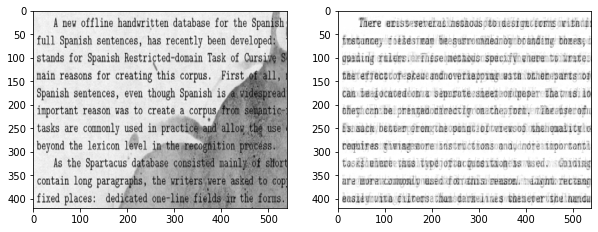

In [ ]:
import matplotlib.pyplot as plt

predicted_label = np.squeeze(autoencoder.predict(X_test_reshape))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(X_test_reshape[1].reshape(420, 540)), cmap='gray')
ax[1].imshow(predicted_label[1].reshape(420, 540), cmap='gray')
plt.show()



Basic CNN Layer

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 420, 540, 1)]     0         
                                                                 
 conv2d_49 (Conv2D)          (None, 420, 540, 128)     1280      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 210, 270, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 210, 270, 64)      73792     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 105, 135, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 105, 135, 32)      184

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Size of Test :  (72, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 6s 279ms/step - loss: 0.6909 - root_mean_squared_error: 0.3415 - val_loss: 0.6905 - val_root_mean_squared_error: 0.3451
Epoch 2/100
17/17 [==============================] - 5s 276ms/step - loss: 0.6903 - root_mean_squared_error: 0.3411 - val_loss: 0.6899 - val_root_mean_squared_error: 0.3447
Epoch 3/100
17/17 [==============================] - 5s 273ms/step - loss: 0.6897 - root_mean_squared_error: 0.3407 - val_loss: 0.6894 - val_root_mean_squared_error: 0.3443
Epoch 4/100
17/17 [==============================] - 5s 283ms/step - loss: 0.6892 - root_mean_squared_error: 0.3403 - val_loss: 0.6888 - val_root_mean_squared_error: 0.3439
Epoch 5/100
17/17 [==============================] - 5s 286ms/step - loss: 0.6886 - root_mean_squared

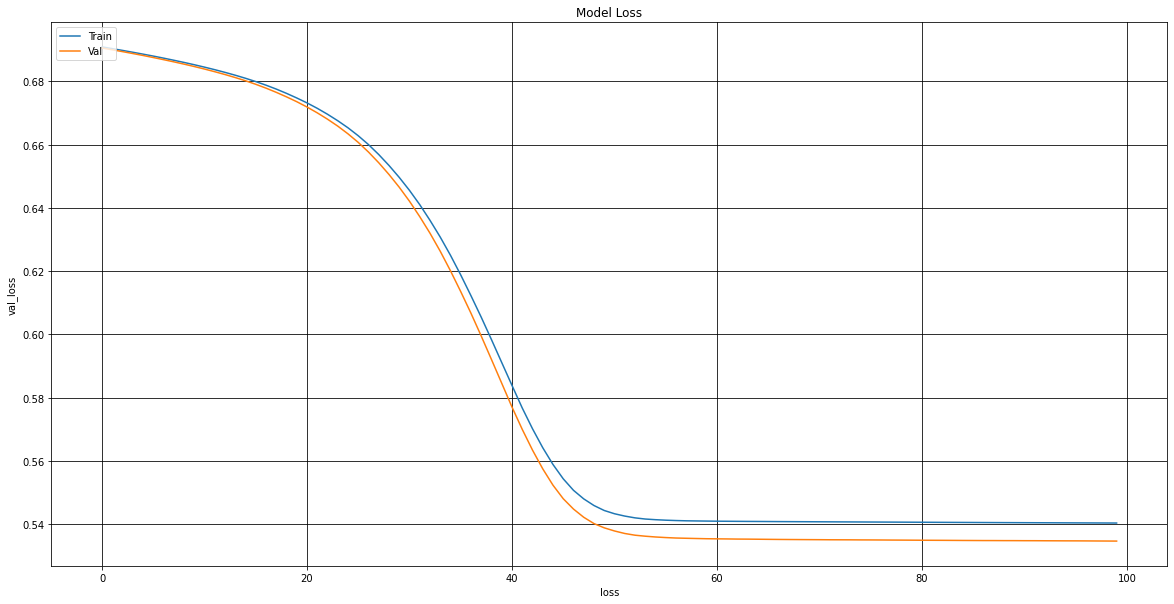

In [ ]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=[RootMeanSquaredError()])
autoencoder.summary()

X = []
Y = []
W = []
train_images = os.listdir(train_path)
train_labels = os.listdir(train_clean_path)
test_images = os.listdir(test_path)
print(len(train_labels))
#raise Exception
for img in train_images:
    img = load_img(train_path / img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_clean_path / img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)
  
for img in test_images:
    img = load_img(test_path / img, grayscale=True, target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    W.append(img)

X = np.array(X)
Y = np.array(Y)
W = np.array(W)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)
print("Size of Test : ", W.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

def plot_loss(autoencoder_model, x = 'loss', y = 'val_loss'): 
  fig, ax = plt.subplots( figsize=(20,10)) 
  ax.plot(autoencoder_model.history[x]) 
  ax.plot(autoencoder_model.history[y]) 
  plt.title('Model Loss') 
  plt.ylabel(y) 
  plt.xlabel(x) 
  plt.legend(['Train', 'Val'], loc='upper left') 
  ax.grid(color='black') 
  plt.show() 
autoencoder_model = autoencoder.fit(X_train, X_train, epochs=100, batch_size=8, 
                shuffle=True, validation_data=(X_valid, X_valid), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])
plot_loss(autoencoder_model)

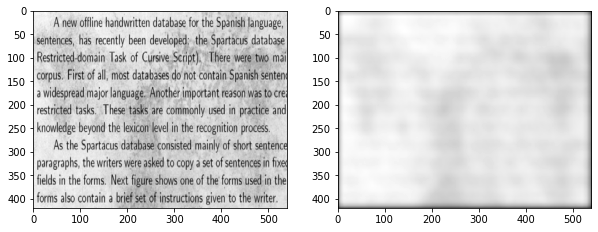

In [ ]:
sample_test = W[5]
sample_test_img = np.expand_dims(sample_test, axis=0)
#Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))
#print(predicted_label)
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label), cmap='gray')
plt.show()

CNN complex Model

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 420, 540, 1)]     0         
                                                                 
 conv2d_56 (Conv2D)          (None, 420, 540, 32)      320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 210, 270, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 210, 270, 16)      4624      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 105, 135, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 105, 135, 8)       116

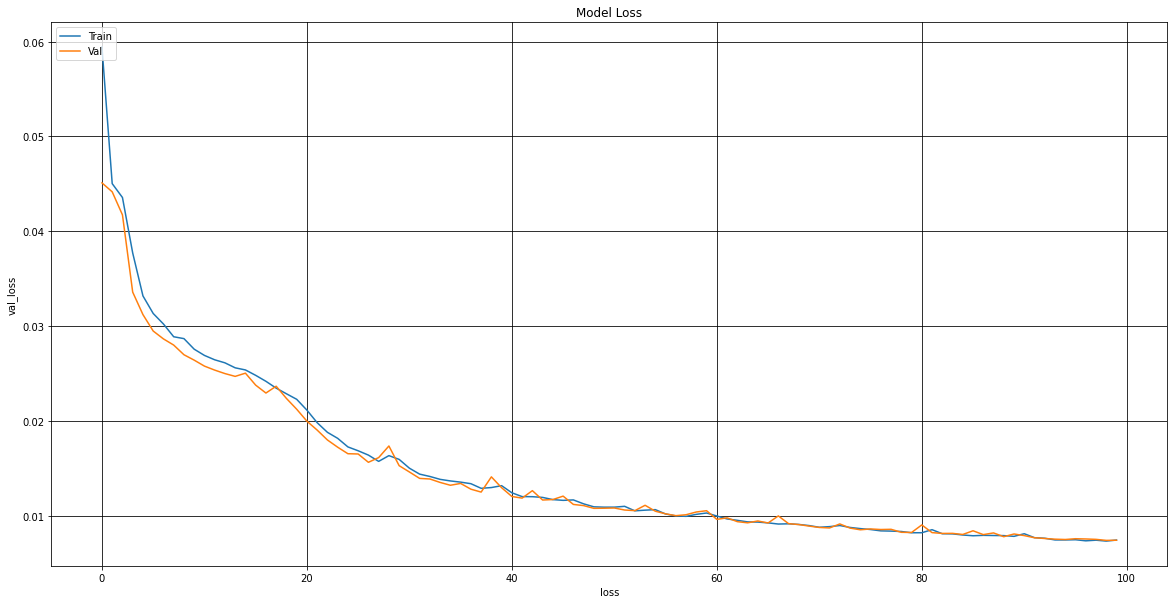

In [ ]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, x)
autoencoder.compile(optimizer='adam', loss = 'mse', metrics=[RootMeanSquaredError()])
autoencoder.summary()

def plot_loss(complexCNN, x = 'loss', y = 'val_loss'): 
 fig, ax = plt.subplots( figsize=(20,10)) 
 ax.plot(model.history[x]) 
 ax.plot(model.history[y]) 
 plt.title('Model Loss') 
 plt.ylabel(y) 
 plt.xlabel(x) 
 plt.legend(['Train', 'Val'], loc='upper left') 
 ax.grid(color='black') 
 plt.show() 
complexCNN = autoencoder.fit(X_train, X_train, epochs=100, batch_size=8, 
                shuffle=True, validation_data=(X_valid, X_valid), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])
plot_loss(complexCNN)



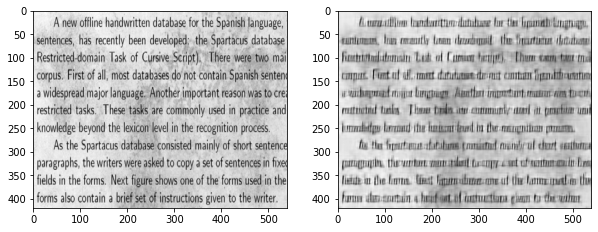

In [ ]:
sample_test = W[5]
sample_test_img = np.expand_dims(sample_test, axis=0)
#Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label), cmap='gray')
plt.show()

Complex CNN_optim

In [ ]:
# CNN Complex 2
input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.leaky_relu, padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)

x = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.leaky_relu, padding = "same")(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

cnncomplex_autoencoder = tf.keras.models.Model(input_img, decoded)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005)
cnncomplex_autoencoder.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
cnncomplex_autoencoder.summary()

cnncomplex_autoencoder.fit(X_train, y_train, epochs=100, batch_size=5, 
                shuffle=True, validation_data=(X_valid, y_valid), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 420, 540, 1)]     0         
                                                                 
 conv2d_76 (Conv2D)          (None, 420, 540, 32)      832       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 210, 270, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 210, 270, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_77 (Conv2D)          (None, 210, 270, 16)      12816     
                                                                 
 conv2d_78 (Conv2D)          (None, 210, 270, 32)      128

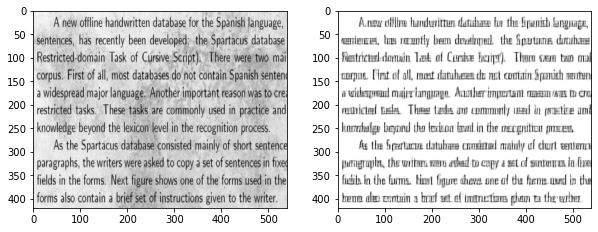

In [ ]:
sample_test = W[5]
#print(sample_test.shape)
sample_test_img = np.expand_dims(sample_test, axis=0)
#print(sample_test_img.shape)
#Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))
#print(predicted_label)
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label), cmap='gray')
plt.show()

# **Model comparisons**

Model | Loss(RMSE)
--|--
Dense Layer ANN Model | 0.1565
Basic CNN Model | 0.2137
CNN Complex Model | 0.1392
Complex CNN_optim | 0.0364


*****Discussion*****
From the table above it can be seen that the Complex CNN_optim model is performing the best with loss of 0.0364 RMSE. Moreover, comparing the test and predicted plot of the images we can say that the complex CNN Model2 is performing the best with reconstruction of images.